# SAT & GPA Linear Regression 

In [4]:
#import necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [5]:
data = pd.read_csv("C:/Users\ellen\Downloads\SAT.csv")

In [6]:
#explore our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Attendance  84 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.1+ KB


In [15]:
data.head(10)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No
6,1764,3.00,No
7,1764,3.00,No
8,1792,3.01,No
9,1850,3.01,No


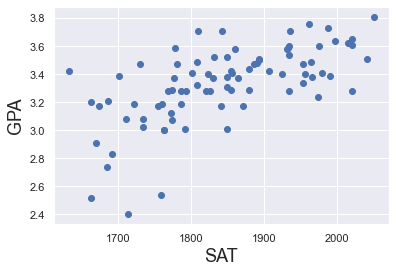

In [20]:
#visualization of dataset
x = data['SAT']
y = data['GPA']
plt.scatter(x,y)
plt.xlabel('SAT', fontsize=18)
plt.ylabel('GPA', fontsize=18)
plt.show()

In [22]:
#create a model showing interception,by using statisticaltable

x1=sm.add_constant(x)
model= sm.OLS(y,x1)
res= model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           7.20e-11
Time:                        18:15:53   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

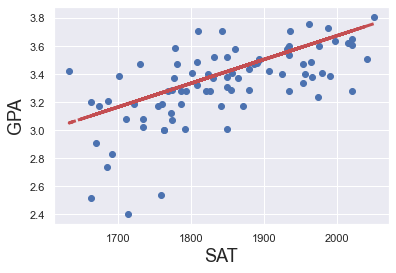

In [24]:
#found the intercept, now plot 
plt.scatter(x,y)
yinter = 0.0017*x + 0.2750

plt.plot(x,yinter, 'r--',lw=3, label='Regression line')
plt.xlabel('SAT', fontsize=18)
plt.ylabel('GPA', fontsize=18)
plt.show()

# Regression With Attendance

In [26]:
#convert our attendance data from categorical into numeric(0 and 1)
data['Attendance'] = data ['Attendance'].map({'Yes':1,'No':0})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   SAT         84 non-null     int64  
 1   GPA         84 non-null     float64
 2   Attendance  84 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 2.1 KB


In [28]:
x= data[['SAT','Attendance']]
y= data['GPA']


In [29]:
x1=sm.add_constant(x)
model= sm.OLS(y,x1)
res= model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 27 Sep 2022   Prob (F-statistic):           2.19e-15
Time:                        18:47:58   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

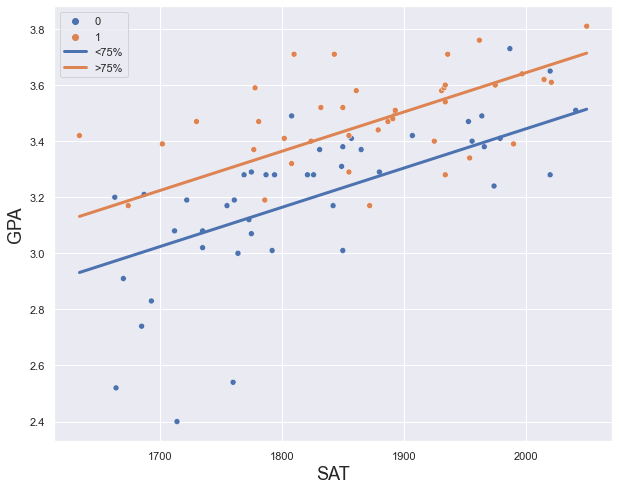

In [35]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=data['SAT'], y= data['GPA'], hue= data['Attendance'])
y_no=0.0014*data['SAT'] + 0.6439
y_yes=0.0014*data['SAT'] + 0.8439

sns.lineplot(x=data['SAT'], y=y_no, lw=3, label= '<75%')
sns.lineplot(x=data['SAT'], y=y_yes, lw=3, label= '>75%')

plt.xlabel('SAT', fontsize=18)
plt.ylabel('GPA', fontsize=18)
plt.show()

# overview